In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

2025-04-08 18:01:16.970781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-08 18:01:17.073258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-08 18:01:17.073963: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-08 18:01:17.191081: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-08 18:01:18.624769: W tensorflow/compiler/tf

In [2]:
aqi = pd.read_csv("data/AQI.csv").dropna()

In [3]:
aqi.sample(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,AQI,Green_Cover
3226,39.0,88.048138,23.9,45.0,46.1,25.8,2.65,3.4,756,Hazardous,506.0,19.77
2711,23.6,60.700000,2.9,6.9,15.8,3.0,1.09,12.4,506,Good,51.0,30.72
3159,22.2,60.100000,19.6,22.5,17.6,7.5,0.97,12.1,558,Good,95.0,26.49
1649,25.2,43.900000,0.4,4.9,12.3,4.8,1.08,12.7,471,Good,91.0,25.80
4688,37.3,76.100000,7.9,18.8,39.5,11.9,2.27,3.5,434,Poor,316.0,18.38


In [4]:
aqi[['Proximity_to_Industrial_Areas', 'Population_Density', 'Green_Cover', 'AQI']].describe()

,Proximity_to_Industrial_Areas,Population_Density,Green_Cover,AQI
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,8.425400,497.423800,30.694480,172.00940
std,3.610944,152.754084,13.134288,129.66907
min,2.500000,188.000000,10.020000,23.00000
25%,5.400000,381.000000,19.980000,79.00000
50%,7.900000,494.000000,28.130000,118.00000
75%,11.100000,600.000000,41.332500,236.25000
max,25.800000,957.000000,59.940000,677.00000


In [5]:
AQI = aqi.sample(1000)

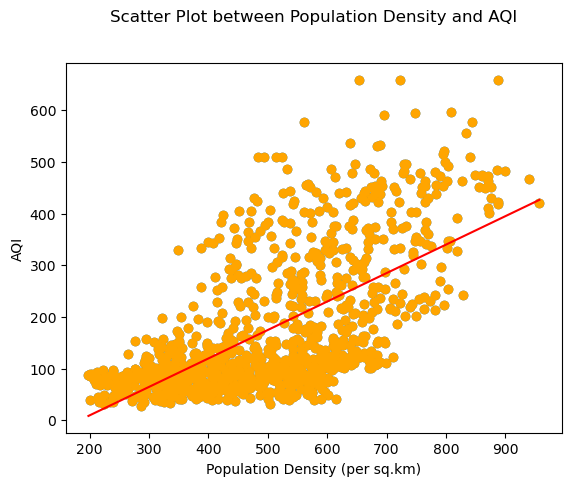

In [6]:
x,y = AQI['Population_Density'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y)
plt.scatter(x,y,color='orange')
plt.xlabel("Population Density (per sq.km)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Population Density and AQI",pad=30)
plt.show()

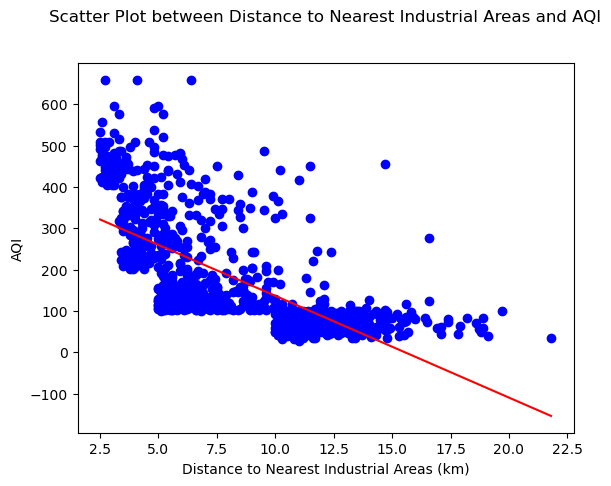

In [7]:
x,y = AQI['Proximity_to_Industrial_Areas'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='blue')
plt.xlabel("Distance to Nearest Industrial Areas (km)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Distance to Nearest Industrial Areas and AQI",pad=30)
plt.show()

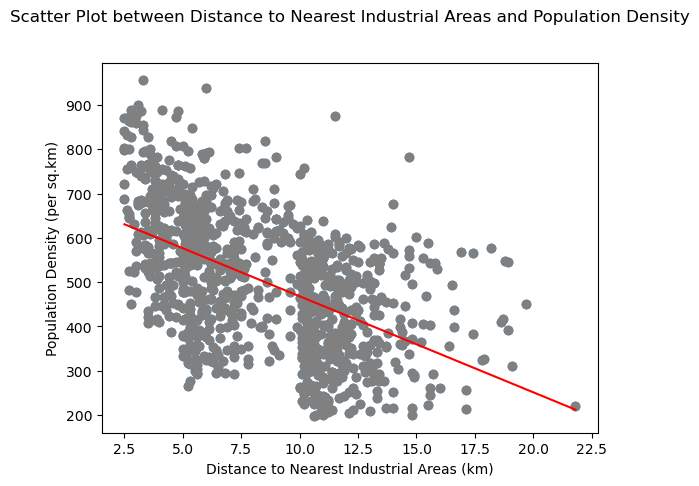

In [8]:
x,y = AQI['Proximity_to_Industrial_Areas'].values, AQI['Population_Density'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.scatter(x,y)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='grey')
plt.xlabel("Distance to Nearest Industrial Areas (km)")
plt.ylabel("Population Density (per sq.km)")
plt.title("Scatter Plot between Distance to Nearest Industrial Areas and Population Density",pad=30)
plt.show()

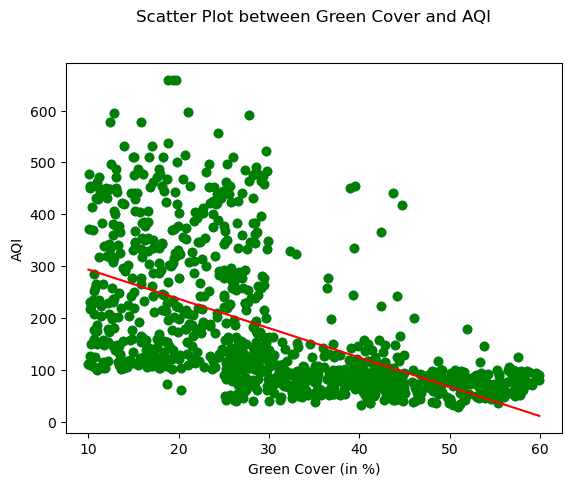

In [9]:
x,y = AQI['Green_Cover'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.scatter(x,y)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='green')
plt.xlabel("Green Cover (in %)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Green Cover and AQI",pad=30)
plt.show()

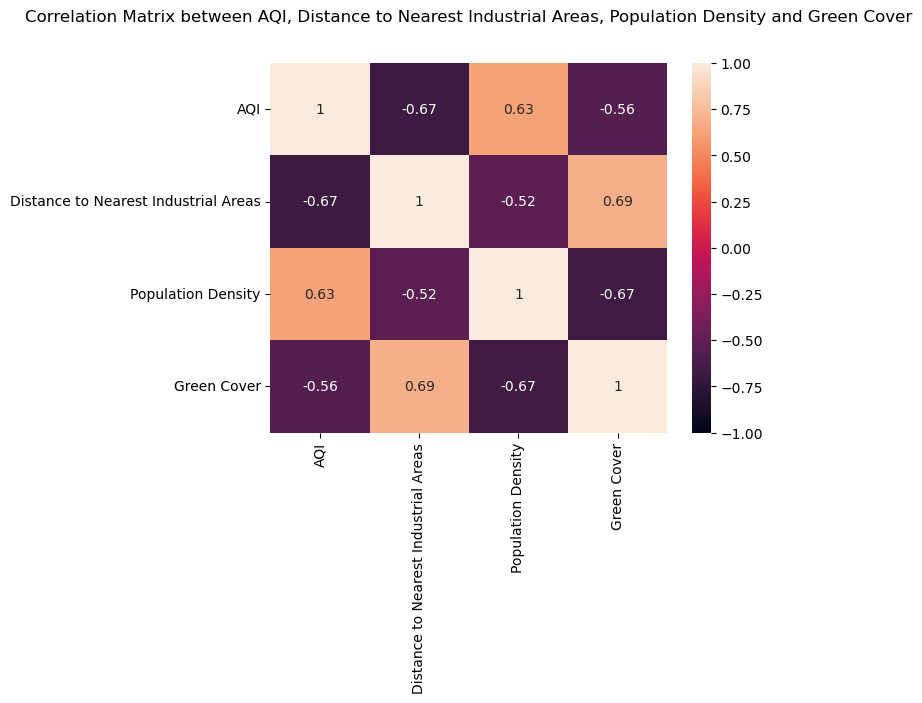

In [50]:
correlation = AQI[['AQI','Proximity_to_Industrial_Areas','Population_Density','Green_Cover']].corr()

axis_corr = sns.heatmap(correlation, vmin=-1.0, vmax=1.0, annot=True, xticklabels=['AQI','Distance to Nearest Industrial Areas','Population Density','Green Cover'], yticklabels=['AQI','Distance to Nearest Industrial Areas','Population Density','Green Cover'])

plt.title("Correlation Matrix between AQI, Distance to Nearest Industrial Areas, Population Density and Green Cover", pad=30)
plt.show()

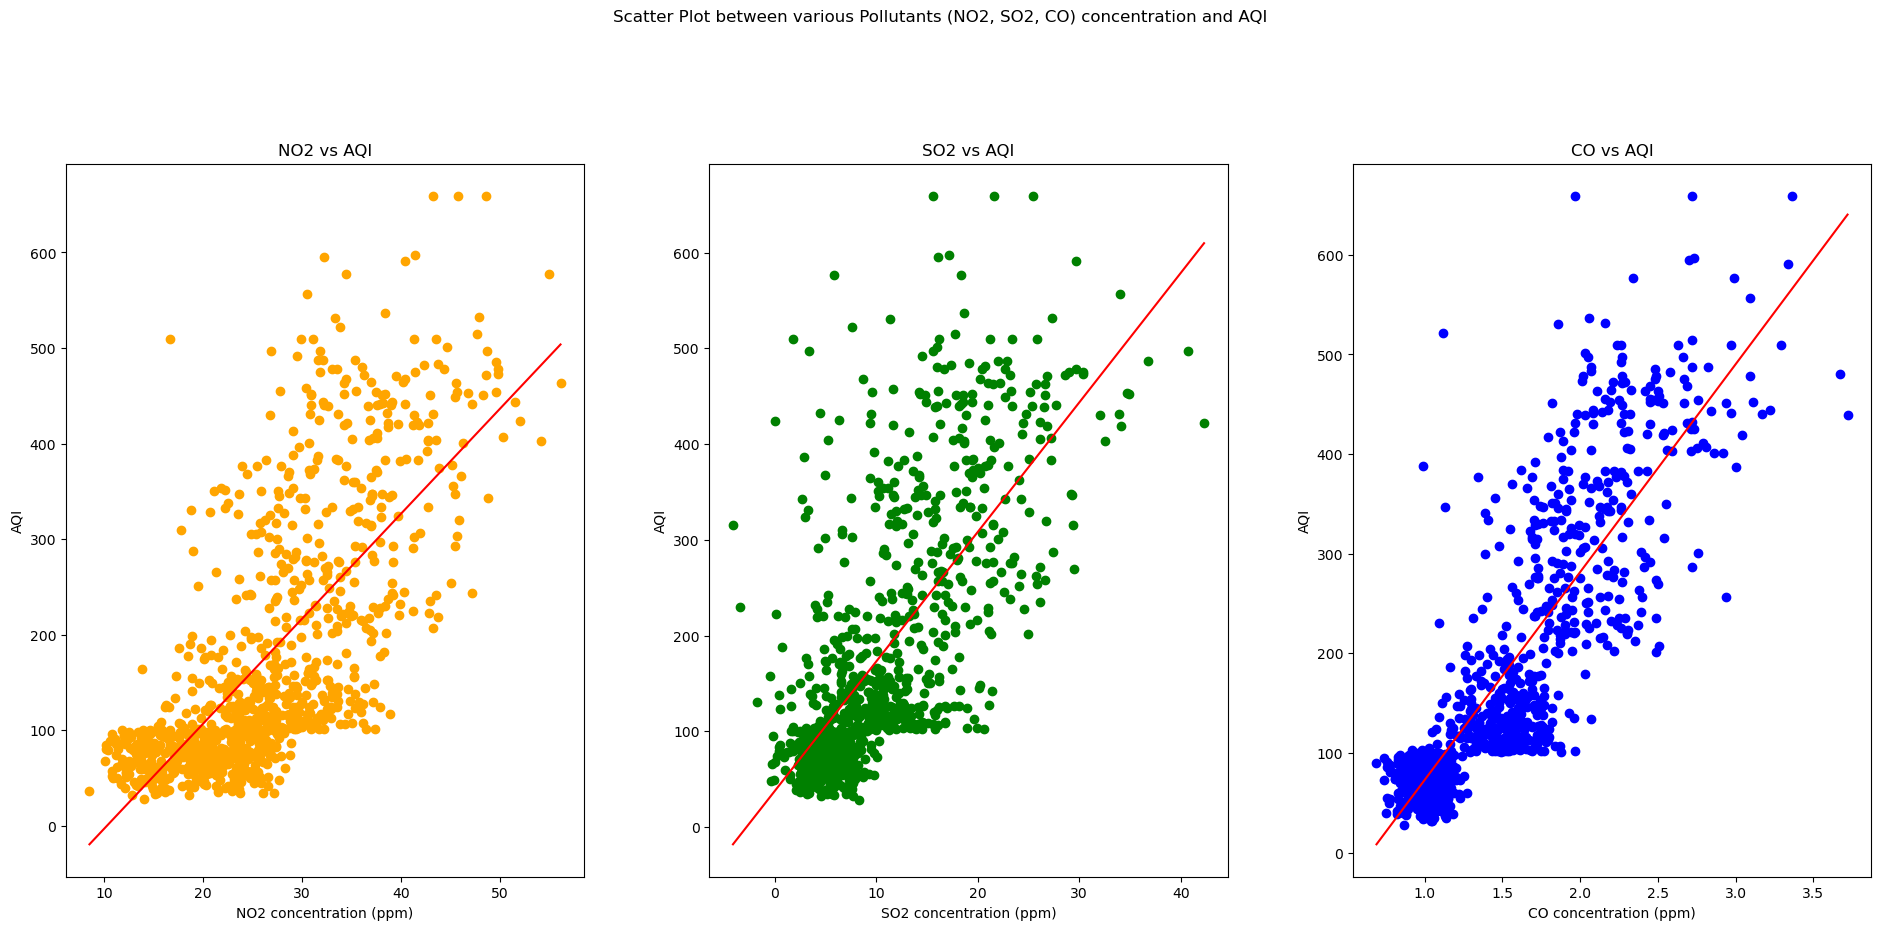

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle("Scatter Plot between various Pollutants (NO2, SO2, CO) concentration and AQI")

pollutants = ['NO2', 'SO2', 'CO']
colors = ['orange', 'green', 'blue']
for i, pollutant in enumerate(pollutants):
    x, y = AQI[pollutant].values, AQI['AQI'].values
    b, a = np.polyfit(x, y, 1)
    seq = np.linspace(min(x), max(x), 100)

    axes[i].scatter(x, y, color=colors[i])
    axes[i].plot(seq, a + b * seq, color='red')
    axes[i].set_xlabel(f"{pollutant} concentration (ppm)")
    axes[i].set_ylabel("AQI")
    axes[i].set_title(f"{pollutant} vs AQI")

plt.tight_layout(pad=5.0)
plt.show()


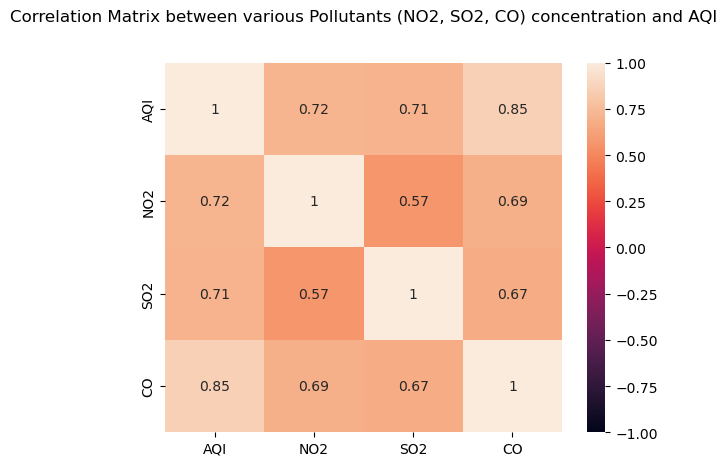

In [12]:
correlation = AQI[['AQI','NO2','SO2','CO']].corr()

axis_corr = sns.heatmap(correlation, vmin=-1.0, vmax=1.0, annot=True,)

plt.title("Correlation Matrix between various Pollutants (NO2, SO2, CO) concentration and AQI", pad=30)
plt.show()

In [13]:
AQI['Humidity'].describe()

count    1000.000000
mean       67.855710
std        13.610189
min        36.300000
25%        57.075000
50%        68.700000
75%        79.100000
max        92.900000
Name: Humidity, dtype: float64

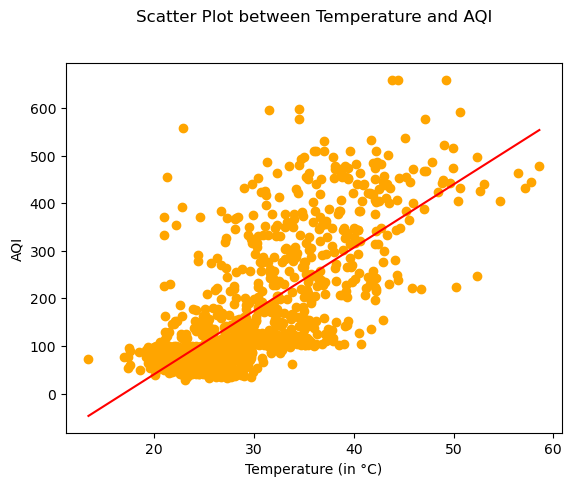

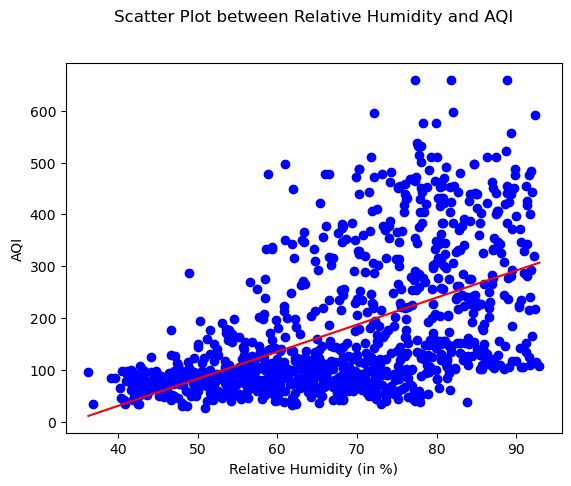

In [14]:
x,y = AQI['Temperature'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='orange')
plt.xlabel("Temperature (in °C)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Temperature and AQI",pad=30)
plt.show()

x,y = AQI['Humidity'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='blue')
plt.xlabel("Relative Humidity (in %)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Relative Humidity and AQI",pad=30)
plt.show()

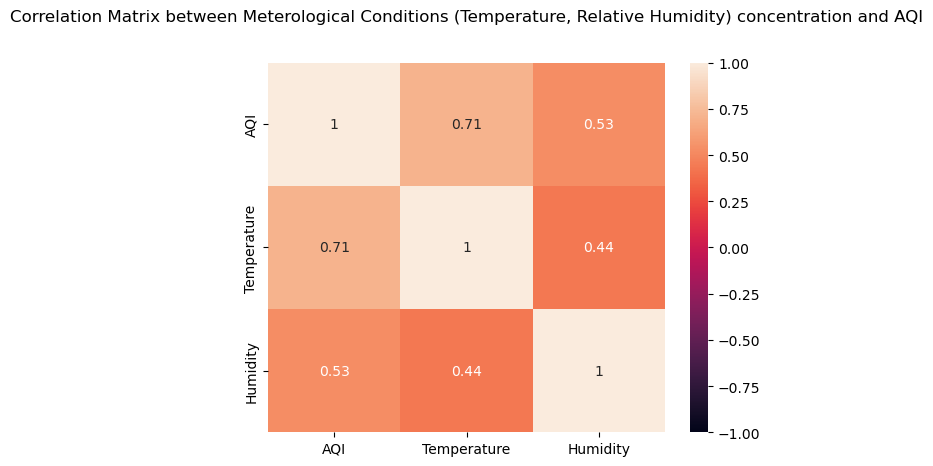

In [15]:
correlation = AQI[['AQI','Temperature','Humidity']].corr()

axis_corr = sns.heatmap(correlation, vmin=-1.0, vmax=1.0, annot=True,)

plt.title("Correlation Matrix between Meterological Conditions (Temperature, Relative Humidity) concentration and AQI", pad=30)
plt.show()

In [16]:
Y = AQI['AQI'].to_numpy()
X = AQI[['Temperature', 'Humidity', 
         'NO2', 'SO2', 'CO',
         'Proximity_to_Industrial_Areas', 'Population_Density','Green_Cover']].to_numpy()

In [17]:
SPLIT = int(0.7*(X.shape[0]))
X_TRAIN, Y_TRAIN = X[0:SPLIT], Y[0:SPLIT]
X_TEST, Y_TEST = X[SPLIT:], Y[SPLIT:]

In [51]:
REG_MODEL = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,), name='Input_Layer'),
    tf.keras.layers.Dense(1, name='Final_Layer')
], name='MLR')

REG_MODEL.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae","mse",tf.keras.metrics.R2Score])

# REG_MODEL.load_weights("model/MLR.weights.h5")

In [52]:
REG_MODEL.summary()

Model: "MLR"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Final_Layer (Dense)             │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
training = REG_MODEL.fit(X_TRAIN, Y_TRAIN, validation_data=[X_TEST,Y_TEST] ,epochs=1000)

Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 50.9613 - mae: 50.9613 - mse: 5252.0454 - r2_score: 0.7094 - val_loss: 51.2280 - val_mae: 51.2280 - val_mse: 4778.4409 - val_r2_score: 0.7101
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.6541 - mae: 54.6541 - mse: 6073.3027 - r2_score: 0.6959 - val_loss: 51.2084 - val_mae: 51.2084 - val_mse: 4764.8813 - val_r2_score: 0.7109
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.3185 - mae: 52.3185 - mse: 5371.7031 - r2_score: 0.7081 - val_loss: 51.2530 - val_mae: 51.2530 - val_mse: 4794.7632 - val_r2_score: 0.7091
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.6231 - mae: 52.6231 - mse: 5737.2959 - r2_score: 0.6809 - val_loss: 51.2964 - val_mae: 51.2964 - val_mse: 4817.8364 - val_r2_score: 0.7077
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.2749 - mae: 49.2749 - mse: 5111.8496 - r2_score: 0.6977 - val_loss: 51.2249 - val_mae: 51.2249 - val_mse: 4778.7412 - val_r2_sco

In [63]:
REG_MODEL.save_weights("model/MLR.weights.h5")

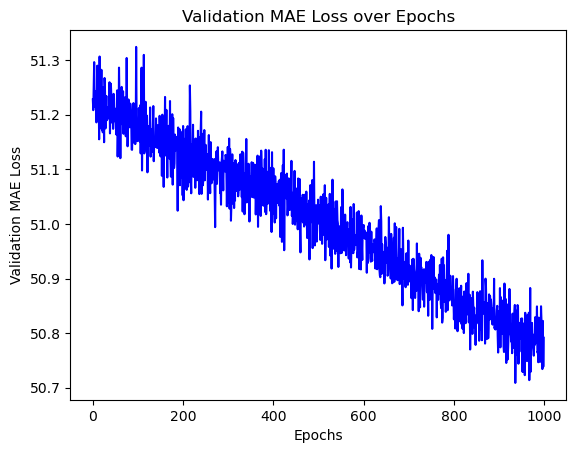

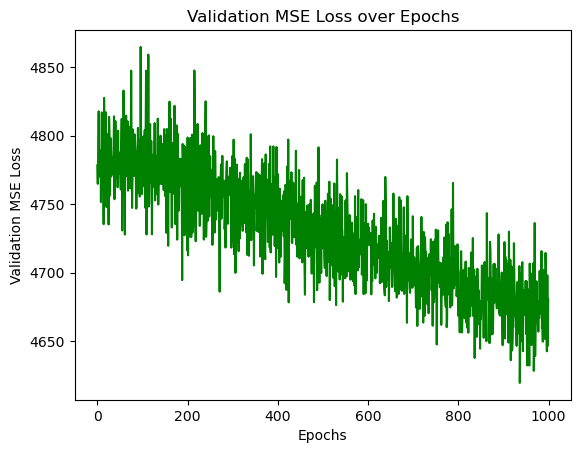

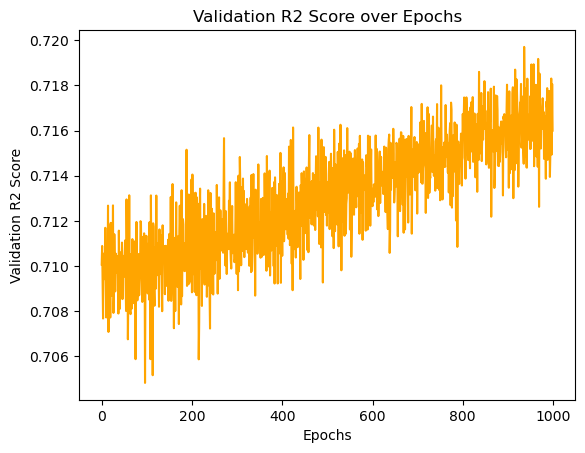

In [58]:
plt.plot(training.history['val_mae'],color='blue')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE Loss')
plt.title("Validation MAE Loss over Epochs")
plt.show()

plt.plot(training.history['val_mse'],color='green')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE Loss')
plt.title("Validation MSE Loss over Epochs")
plt.show()

plt.plot(training.history['val_r2_score'],color='orange')
plt.xlabel('Epochs')
plt.ylabel('Validation R2 Score')
plt.title("Validation R2 Score over Epochs")
plt.show()

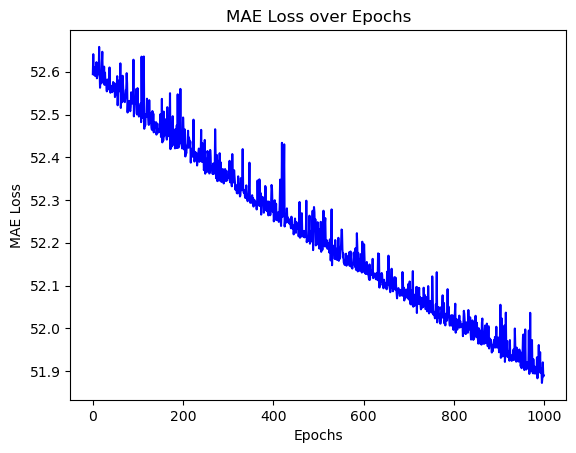

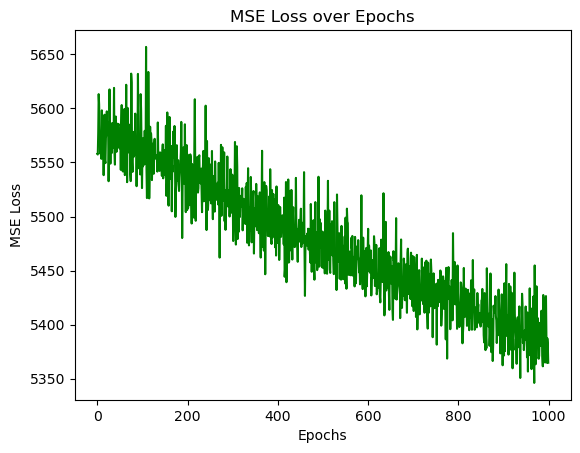

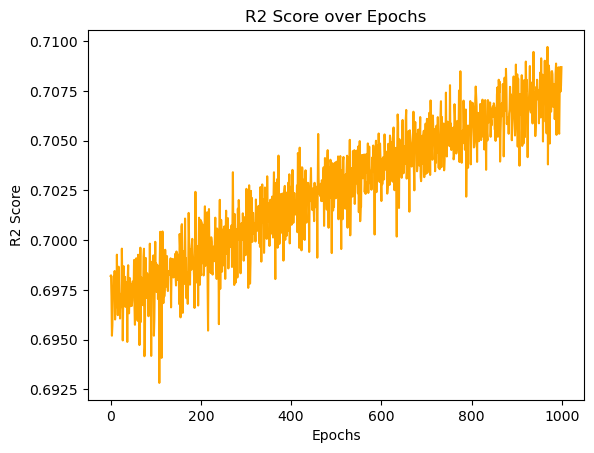

In [59]:
plt.plot(training.history['mae'],color='blue')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title("MAE Loss over Epochs")
plt.show()

plt.plot(training.history['mse'],color='green')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title("MSE Loss over Epochs")
plt.show()

plt.plot(training.history['r2_score'],color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title("R2 Score over Epochs")
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


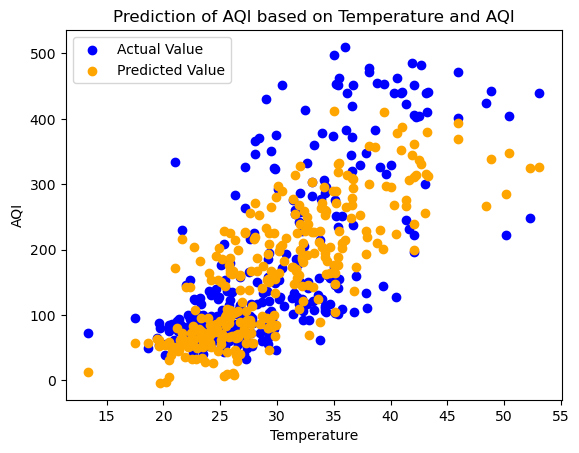

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


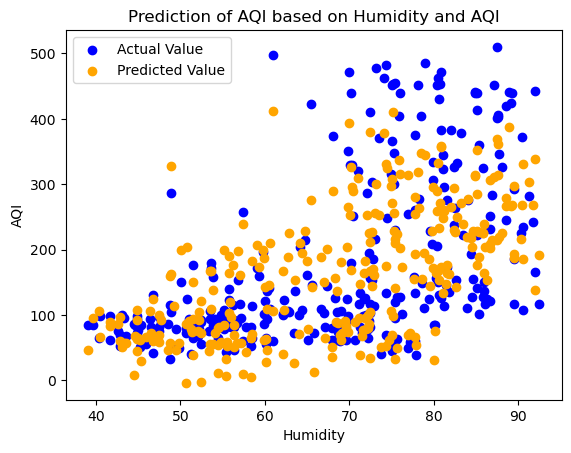

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


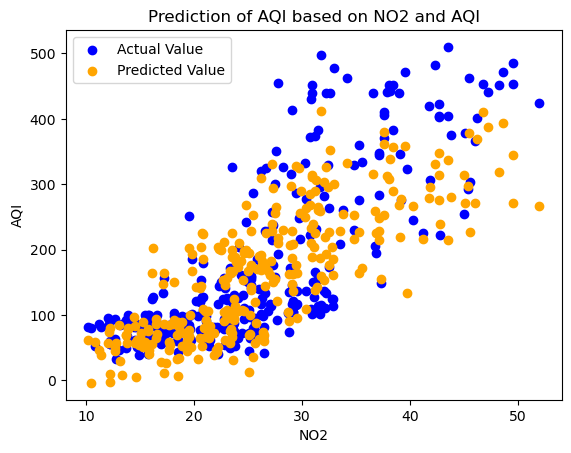

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


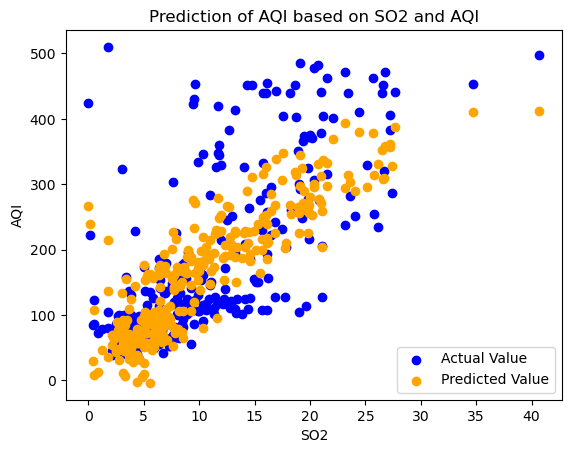

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


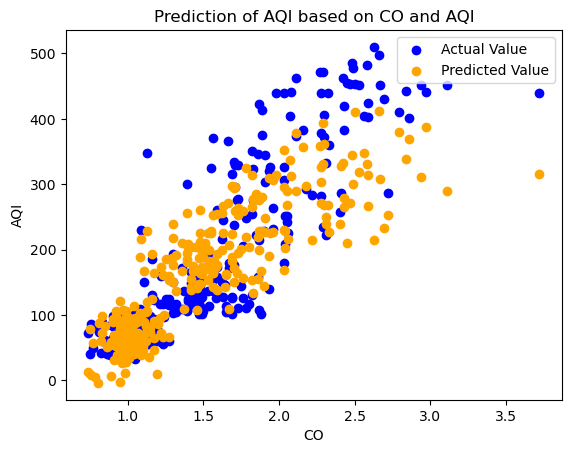

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


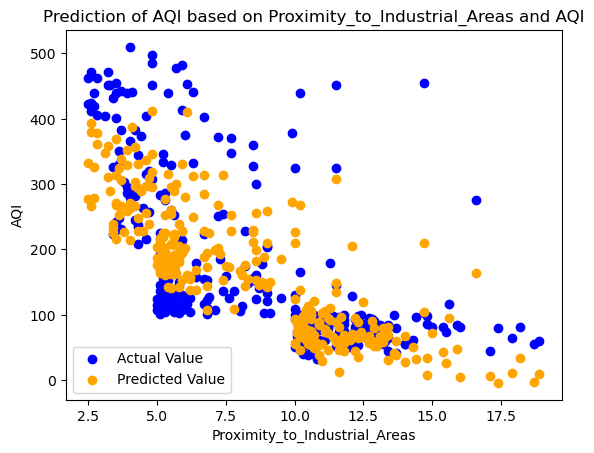

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


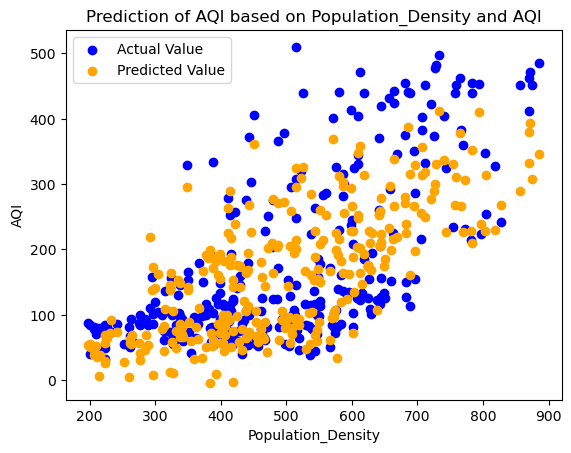

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


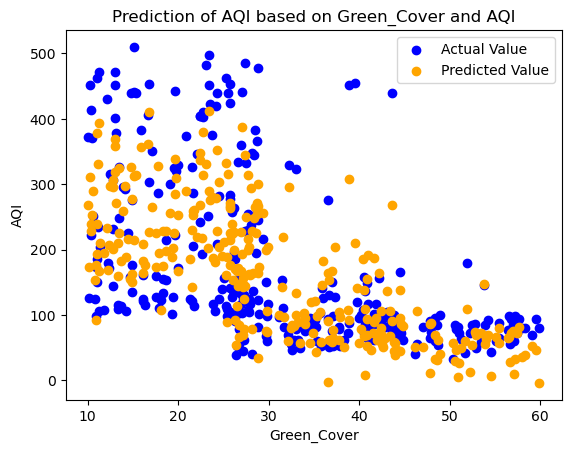

In [60]:
columns = [ 'Temperature', 'Humidity', 
            'NO2', 'SO2', 'CO',
            'Proximity_to_Industrial_Areas', 'Population_Density','Green_Cover'
        ]

for i in range(len(columns)):
    plt.scatter(list(map(lambda x: x[i],X_TEST)), Y_TEST,color='blue')
    plt.scatter(list(map(lambda x: x[i],X_TEST)), REG_MODEL.predict(X_TEST),color='orange')
    plt.xlabel(columns[i])
    plt.ylabel('AQI')
    plt.title(f'Prediction of AQI based on {columns[i]} and AQI')
    plt.legend(['Actual Value','Predicted Value'])
    plt.show()